## Quiz #0307

### "EDA and ANOVA for guinea pig tooth growth"

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

#### Answer the following questions by providing Python code:

We will use the dataset "data_ToothGrowth.csv". 
- len = teeth length. 
- supp = supplementary type with two possible values: VC (vitamin C) or OJ (orange juice). 
- dose (mgr/day) = dosage per day with three possible values: 0.5, 1.0, 2.0.

In [4]:
df = pd.read_csv('data_ToothGrowth.csv', header='infer')

In [44]:
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [45]:
df.shape

(60, 3)

In [46]:
df.supp.value_counts()

VC    30
OJ    30
Name: supp, dtype: int64

1). Perform the EDA and ANOVA ($\alpha=$ 5%) with the 'supp' variable. <br>
Summarize the result.

In [47]:
# Categories of 'supp'. 
df.supp.value_counts()

VC    30
OJ    30
Name: supp, dtype: int64

In [7]:
# Group by category.
print(df.groupby(['supp']).len.mean())

supp
OJ    20.663333
VC    16.963333
Name: len, dtype: float64


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd54ded1990>)

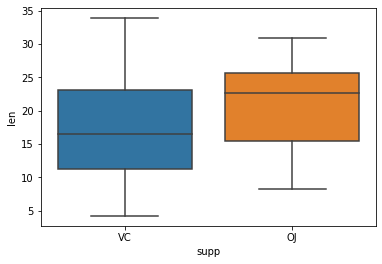

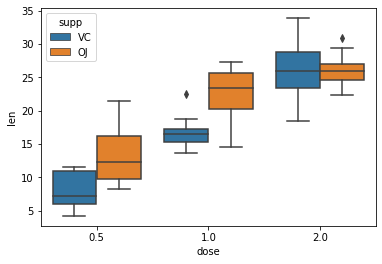

In [18]:
# Multiple Boxplots.
sns.boxplot(x="supp", y="len",
            
            data=df)

plt.figure(), sns.boxplot(x="dose", y="len",
            hue = 'supp',
            data=df)

In [65]:
# ANOVA.
st.f_oneway(df[df.supp=='VC'].len, df[df.supp=='OJ'].len)

F_onewayResult(statistic=3.6682525410709697, pvalue=0.060393371224128745)

In [ ]:
# Result summary.
# null hypothesis H0 = variances are equal
#  since Pvalue is greater than 0.05, we can not reject the null hypothesis

2). Perform the EDA and ANOVA ($\alpha=$ 5%) with the 'dose' variable. <br>
Summarize the result.

In [5]:
# Categories of 'dose'. 
df.dose.value_counts()

2.0    20
1.0    20
0.5    20
Name: dose, dtype: int64

In [11]:
# Group by category.
print(df.groupby(['dose']).len.mean())

dose
0.5    10.605
1.0    19.735
2.0    26.100
Name: len, dtype: float64


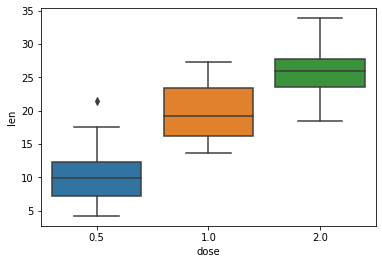

In [12]:
sns.boxplot(x="dose", y="len",
            
            data=df)

In [16]:
# ANOVA.
st.f_oneway(df[df.dose==0.5].len, df[df.dose==1.0].len, df[df.dose==2.0].len)

F_onewayResult(statistic=67.41573785674247, pvalue=9.532727011699946e-16)

In [19]:
# Result summary.
# Since pvalue is way inferior than 0.05, than we reject the null hypothesis, thus the variances are not equal.